In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore') 
from scipy.io import arff
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict

In [2]:
train_set=pd.read_csv("C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/train_set.csv",encoding='unicode_escape')
test_set=pd.read_csv("C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/test_set.csv")
print("size of train set=",train_set.shape)
print("size of test set=",test_set.shape)

size of train set= (9805, 20)
size of test set= (2453, 20)


In [3]:
#Preprocessing & feature extraction
#delete missing data because only 16 which is a very small number
#the feature：track, artist, uri are not usable features, so delete them.
#outlier
df_energy=train_set["energy"].describe()
IQR=df_energy["75%"]-df_energy["25%"]
if (df_energy["min"]>df_energy["25%"]-1.5*IQR)&(df_energy["max"]<df_energy["75%"]+1.5*IQR):
    print("no outlier for danceability")
else:
    print("process for the outlier")
print(df_energy)

process for the outlier
count    9805.000000
mean        0.679076
std         0.241311
min         0.000251
25%         0.547000
50%         0.725000
75%         0.871000
max         0.999000
Name: energy, dtype: float64


In [4]:
train_set_numerical=train_set.drop(['track'], axis=1)
train_set_numerical=train_set_numerical.drop(['Unnamed: 0'], axis=1).drop(['artist'], axis=1).drop(['uri'],axis=1)
train_set_numerical

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0            0.471  0.6660    2    -5.141     1       0.0322      0.043700   
1            0.661  0.7720    3    -6.395     0       0.0422      0.227000   
2            0.552  0.8310    8    -5.217     1       0.0298      0.039100   
3            0.155  0.9360    9    -6.239     1       0.0777      0.000001   
4            0.737  0.8850    9    -5.547     0       0.2060      0.013200   
5            0.411  0.9000    0    -4.079     1       0.0805      0.031900   
6            0.851  0.6290    1    -8.385     1       0.1750      0.007050   
7            0.465  0.7980    0    -8.449     0       0.0429      0.098600   
8            0.133  0.7450    7    -8.360     1       0.0449      0.000012   
9            0.614  0.6860    9    -6.483     0       0.2100      0.010500   
10           0.681  0.5930    5    -9.327     1       0.0251      0.435000   
11           0.561  0.7480    0    -8.175     0       0.0551      0.598000   
12           0.618  0.9110    1    -4.853     1       0.0523      0.002140   
13           0.315  0.3620    7    -7.889     1       0.0271      0.458000   
14           0.468  0.9690    6    -3.669     0       0.2530      0.000019   
15           0.306  0.9950    2    -3.203     1       0.1000      0.000030   
16           0.165  0.9770    1    -8.826     1       0.1330      0.000055   
17           0.533  0.0608    6   -30.090     1       0.0283      0.993000   
18           0.763  0.8750    9    -5.797     0       0.0262      0.024000   
19           0.274  0.9760    1    -4.277     1       0.1750      0.000002   
20           0.531  0.7520    1    -6.161     1       0.0305      0.042100   
21           0.606  0.9420    2    -3.618     1       0.0357      0.000233   
22           0.255  0.0749    0   -22.117     1       0.0324      0.985000   
23           0.791  0.6910    9   -13.803     0       0.0430      0.032900   
24           0.559  0.9380    0    -4.388     1       0.0514      0.000398   
25           0.640  0.7860    1    -5.596     0       0.3500      0.041500   
26           0.347  0.8820    0    -4.444     1       0.0799      0.000163   
27           0.715  0.6080    4    -7.674     1       0.0271      0.014800   
28           0.199  0.2640   11   -14.976     0       0.0322      0.938000   
29           0.707  0.9660   11    -5.089     1       0.2310      0.000545   
...            ...     ...  ...       ...   ...          ...           ...   
9775         0.839  0.8640    5    -6.199     0       0.0471      0.122000   
9776         0.423  0.9540    4    -7.985     0       0.0786      0.001420   
9777         0.568  0.9130    4    -4.719     0       0.3710      0.074600   
9778         0.773  0.7360    9    -5.589     1       0.0383      0.033500   
9779         0.608  0.8510    1    -6.181     1       0.0282      0.019100   
9780         0.655  0.9040    4    -7.390     0       0.3840      0.004900   
9781         0.744  0.6970   11    -5.063     0       0.1970      0.010600   
9782         0.448  0.8770    1    -5.278     1       0.0458      0.000270   
9783         0.317  0.9330    7    -3.552     0       0.0869      0.000033   
9784         0.283  0.9130    9    -4.655     1       0.3860      0.014200   
9785         0.229  0.5000    4    -6.769     1       0.0312      0.166000   
9786         0.929  0.7280    1    -5.524     1       0.1020      0.344000   
9787         0.835  0.7990    9    -6.882     0       0.0527      0.000072   
9788         0.731  0.5910    7    -7.232     1       0.0255      0.815000   
9789         0.465  0.7720    5    -3.932     0       0.0378      0.095900   
9790         0.379  0.6180    5    -7.065     1       0.0586      0.337000   
9791         0.610  0.8220    0    -4.422     1       0.0355      0.017100   
9792         0.687  0.7930    2    -4.254     1       0.1660      0.060300   
9793         0.759  0.6750    9    -5.148     0       0.3130      0.228000   
9794         0.610  0.8170  

In [5]:
for column,row in train_set_numerical.iteritems():
    #print(index) # 输出列名
    df_column=train_set[column].describe()
    IQR=df_column["75%"]-df_column["25%"]
    if (df_column["min"]>df_column["25%"]-1.5*IQR)&(df_column["max"]<df_column["75%"]+1.5*IQR):
        print("no outlier for column", column)
    else:
        print("process for the outlier of",column)

no outlier for column danceability
process for the outlier of energy
no outlier for column key
process for the outlier of loudness
no outlier for column mode
process for the outlier of speechiness
process for the outlier of acousticness
process for the outlier of instrumentalness
process for the outlier of liveness
no outlier for column valence
process for the outlier of tempo
process for the outlier of duration_ms
process for the outlier of time_signature
process for the outlier of chorus_hit
process for the outlier of sections
no outlier for column target


In [6]:
df_energy=train_set["energy"].describe()
IQR_energy=df_energy["75%"]-df_energy["25%"]
train_set_numerical["energy"][train_set_numerical.energy>df_energy["75%"]+1.5*IQR_energy]=df_energy["75%"]+1.5*IQR_energy
train_set_numerical["energy"][train_set_numerical.energy<df_energy["25%"]-1.5*IQR_energy]=df_energy["25%"]-1.5*IQR_energy

df_loudness=train_set["loudness"].describe()
IQR_loudness=df_loudness["75%"]-df_loudness["25%"]
train_set_numerical["loudness"][train_set_numerical.loudness>df_energy["75%"]+1.5*IQR_loudness]=df_loudness["75%"]+1.5*IQR_loudness
train_set_numerical["loudness"][train_set_numerical.loudness<df_energy["25%"]-1.5*IQR_loudness]=df_loudness["25%"]-1.5*IQR_loudness

df_speechiness=train_set["speechiness"].describe()
IQR_speechiness=df_speechiness["75%"]-df_speechiness["25%"]
train_set_numerical["speechiness"][train_set_numerical.speechiness
                                   >df_speechiness["75%"]+1.5*IQR_speechiness]=df_speechiness["75%"]+1.5*IQR_speechiness
train_set_numerical["speechiness"][train_set_numerical.speechiness
                                   <df_speechiness["25%"]-1.5*IQR_speechiness]=df_speechiness["25%"]-1.5*IQR_speechiness

df_acousticness=train_set["acousticness"].describe()
IQR_acousticness=df_acousticness["75%"]-df_acousticness["25%"]
train_set_numerical["acousticness"][train_set_numerical.acousticness
                                    >df_acousticness["75%"]+1.5*IQR_acousticness]=df_acousticness["75%"]+1.5*IQR_acousticness
train_set_numerical["acousticness"][train_set_numerical.acousticness
                                    <df_acousticness["25%"]-1.5*IQR_acousticness]=df_acousticness["25%"]-1.5*IQR_acousticness

df_instrumentalness=train_set["instrumentalness"].describe()
IQR_instrumentalness=df_instrumentalness["75%"]-df_instrumentalness["25%"]
train_set_numerical["instrumentalness"][train_set_numerical.instrumentalness
                              >df_instrumentalness["75%"]+1.5*IQR_instrumentalness]=df_instrumentalness["75%"]+1.5*IQR_instrumentalness
train_set_numerical["instrumentalness"][train_set_numerical.instrumentalness
                              <df_instrumentalness["25%"]-1.5*IQR_instrumentalness]=df_instrumentalness["25%"]-1.5*IQR_instrumentalness

df_liveness=train_set["liveness"].describe()
IQR_liveness=df_liveness["75%"]-df_liveness["25%"]
train_set_numerical["liveness"][train_set_numerical.liveness>df_liveness["75%"]+1.5*IQR_liveness]=df_liveness["75%"]+1.5*IQR_liveness
train_set_numerical["liveness"][train_set_numerical.liveness<df_liveness["25%"]-1.5*IQR_liveness]=df_liveness["25%"]-1.5*IQR_liveness

df_tempo=train_set["tempo"].describe()
IQR_tempo=df_tempo["75%"]-df_tempo["25%"]
train_set_numerical["tempo"][train_set_numerical.tempo>df_tempo["75%"]+1.5*IQR_tempo]=df_tempo["75%"]+1.5*IQR_tempo
train_set_numerical["tempo"][train_set_numerical.tempo<df_tempo["25%"]-1.5*IQR_tempo]=df_tempo["25%"]-1.5*IQR_tempo

df_duration_ms=train_set["duration_ms"].describe()
IQR_duration_ms=df_duration_ms["75%"]-df_duration_ms["25%"]
train_set_numerical["duration_ms"][train_set_numerical.duration_ms
                                   >df_duration_ms["75%"]+1.5*IQR_duration_ms]=df_duration_ms["75%"]+1.5*IQR_duration_ms
train_set_numerical["duration_ms"][train_set_numerical.duration_ms
                                   <df_duration_ms["25%"]-1.5*IQR_duration_ms]=df_duration_ms["25%"]-1.5*IQR_duration_ms

df_time_signature=train_set["time_signature"].describe()
IQR_time_signature=df_time_signature["75%"]-df_time_signature["25%"]
train_set_numerical["time_signature"][train_set_numerical.time_signature
                                      >df_time_signature["75%"]+1.5*IQR_time_signature]=df_time_signature["75%"]+1.5*IQR_time_signature
train_set_numerical["time_signature"][train_set_numerical.time_signature
                                      <df_time_signature["25%"]-1.5*IQR_time_signature]=df_time_signature["25%"]-1.5*IQR_time_signature

df_chorus_hit=train_set["chorus_hit"].describe()
IQR_chorus_hit=df_chorus_hit["75%"]-df_chorus_hit["25%"]
train_set_numerical["chorus_hit"][train_set_numerical.chorus_hit
                                  >df_chorus_hit["75%"]+1.5*IQR_chorus_hit]=df_chorus_hit["75%"]+1.5*IQR_chorus_hit
train_set_numerical["chorus_hit"][train_set_numerical.chorus_hit
                                  <df_chorus_hit["25%"]-1.5*IQR_chorus_hit]=df_chorus_hit["25%"]-1.5*IQR_chorus_hit

df_sections=train_set["sections"].describe()
IQR_sections=df_sections["75%"]-df_sections["25%"]
train_set_numerical["sections"][train_set_numerical.sections>df_sections["75%"]+1.5*IQR_sections]=df_sections["75%"]+1.5*IQR_sections
train_set_numerical["sections"][train_set_numerical.sections<df_sections["25%"]-1.5*IQR_sections]=df_sections["25%"]-1.5*IQR_sections


In [7]:
for column,row in train_set_numerical.iteritems():
    #print(index) #output the index of column
    df_column=train_set_numerical[column].describe()
    IQR=df_column["75%"]-df_column["25%"]
    if (df_column["min"]>= df_column["25%"]-1.5*IQR)&(df_column["max"]<= df_column["75%"]+1.5*IQR):
        print("no outlier for column", column)
    else:
        print("process for the outlier of",column)
#train_set_numerical

no outlier for column danceability
no outlier for column energy
no outlier for column key
no outlier for column loudness
no outlier for column mode
no outlier for column speechiness
no outlier for column acousticness
no outlier for column instrumentalness
no outlier for column liveness
no outlier for column valence
no outlier for column tempo
no outlier for column duration_ms
no outlier for column time_signature
no outlier for column chorus_hit
no outlier for column sections
no outlier for column target


In [8]:
#stdandarization
#self.mean, self.std = X_train.mean(), X_train.std()
#self.feature_num = len(X_train.columns.tolist())
X_train=train_set_numerical.drop(['target'], axis=1)
std_X_train = (X_train - X_train.mean()) / X_train.std()
#applied the std of X_train to the test set
#std_X_test = (X_test - X_train.mean()) / X_train.std()

#find out the time_signature are almostly the same so drop it.
std_X_train=std_X_train.drop(['time_signature'],axis=1)
std_X_train

danceability    energy       key  loudness      mode  speechiness  \
0        -0.439286 -0.058390 -0.916108 -0.706016  0.747838    -0.820845   
1         0.551351  0.385179 -0.637876 -0.706016 -1.337051    -0.659163   
2        -0.016962  0.632070  0.753283 -0.706016  0.747838    -0.859649   
3        -2.086873  1.071454  1.031515 -0.706016  0.747838    -0.085193   
4         0.947606  0.858039  1.031515 -0.706016 -1.337051     1.989184   
5        -0.752119  0.920808 -1.472571  1.371025  0.747838    -0.039922   
6         1.541989 -0.213220 -1.194339 -0.706016  0.747838     1.487971   
7        -0.470569  0.493978 -1.472571 -0.706016 -1.337051    -0.647846   
8        -2.201578  0.272194  0.475051 -0.706016  0.747838    -0.615509   
9         0.306299  0.025302  1.031515 -0.706016 -1.337051     2.053857   
10        0.655629 -0.363866 -0.081412 -0.706016  0.747838    -0.935639   
11        0.029963  0.284748 -1.472571 -0.706016 -1.337051    -0.450594   
12        0.327155  0.966839 -1.194339  1.208753  0.747838    -0.495865   
13       -1.252652 -1.330510  0.475051 -0.706016  0.747838    -0.903303   
14       -0.454928  1.209546  0.196820  1.456983 -1.337051     2.159759   
15       -1.299576  1.318346 -0.916108  1.554682  0.747838     0.275357   
16       -2.034734  1.243023 -1.194339 -0.706016  0.747838     0.808907   
17       -0.116025 -2.590077  0.196820 -0.706016  0.747838    -0.883901   
18        1.083167  0.816193  1.031515 -0.706016 -1.337051    -0.917854   
19       -1.466421  1.238838 -1.194339  1.329514  0.747838     1.487971   
20       -0.126453  0.301486 -1.194339 -0.706016  0.747838    -0.848331   
21        0.264588  1.096562 -0.916108  1.467675  0.747838    -0.764257   
22       -1.565484 -2.531911 -1.472571 -0.706016  0.747838    -0.817612   
23        1.229156  0.046225  1.031515 -0.706016 -1.337051    -0.646229   
24        0.019536  1.079823 -1.472571  1.306242  0.747838    -0.510416   
25        0.441860  0.443763 -1.194339 -0.706016 -1.337051     2.159759   
26       -1.085807  0.845485 -1.472571  1.294501  0.747838    -0.049623   
27        0.832901 -0.301097 -0.359644 -0.706016  0.747838    -0.903303   
28       -1.857462 -1.740602  1.587978 -0.706016 -1.337051    -0.820845   
29        0.791190  1.196992  1.587978  1.159275  0.747838     2.159759   
...            ...       ...       ...       ...       ...          ...   
9775      1.479422  0.770162 -0.081412 -0.706016 -1.337051    -0.579939   
9776     -0.689552  1.146777 -0.359644 -0.706016 -1.337051    -0.070642   
9777      0.066460  0.975208 -0.359644  1.236847 -1.337051     2.159759   
9778      1.135306  0.234533  1.031515 -0.706016  0.747838    -0.722219   
9779      0.275016  0.715762 -1.194339 -0.706016  0.747838    -0.885518   
9780      0.520068  0.937547 -0.359644 -0.706016 -1.337051     2.159759   
9781      0.984104  0.071333  1.587978  1.164726 -1.337051     1.843671   
9782     -0.559205  0.824562 -1.194339 -0.706016  0.747838    -0.600958   
9783     -1.242224  1.058900  0.475051  1.481513 -1.337051     0.063554   
9784     -1.419496  0.975208  1.031515  1.250264  0.747838     2.159759   
9785     -1.701045 -0.753035 -0.359644 -0.706016  0.747838    -0.837013   
9786      1.948672  0.201056 -1.194339 -0.706016  0.747838     0.307694   
9787      1.458567  0.498163  1.031515 -0.706016 -1.337051    -0.489398   
9788      0.916323 -0.372235  0.475051 -0.706016  0.747838    -0.929172   
9789     -0.470569  0.385179 -0.081412  1.401844 -1.337051    -0.730303   
9790     -0.918963 -0.259251 -0.081412 -0.706016  0.747838    -0.394005   
9791      0.285444  0.594409 -1.472571  1.299114  0.747838    -0.767490   
9792      0.686912  0.473055 -0.916108  1.334336  0.747838     1.342457   
9793      1.062312 -0.020728  1.031515 -0.706016 -1.337051     2.159759   
9794      0.285444  0.573486 -1.472571  1.225106  0.747838    -0.806294   
9795      0.342796 -1.887063 -1.194339 -0.706016  0.747838    -0.550837   
9796     -1.664548 -0.091867  1

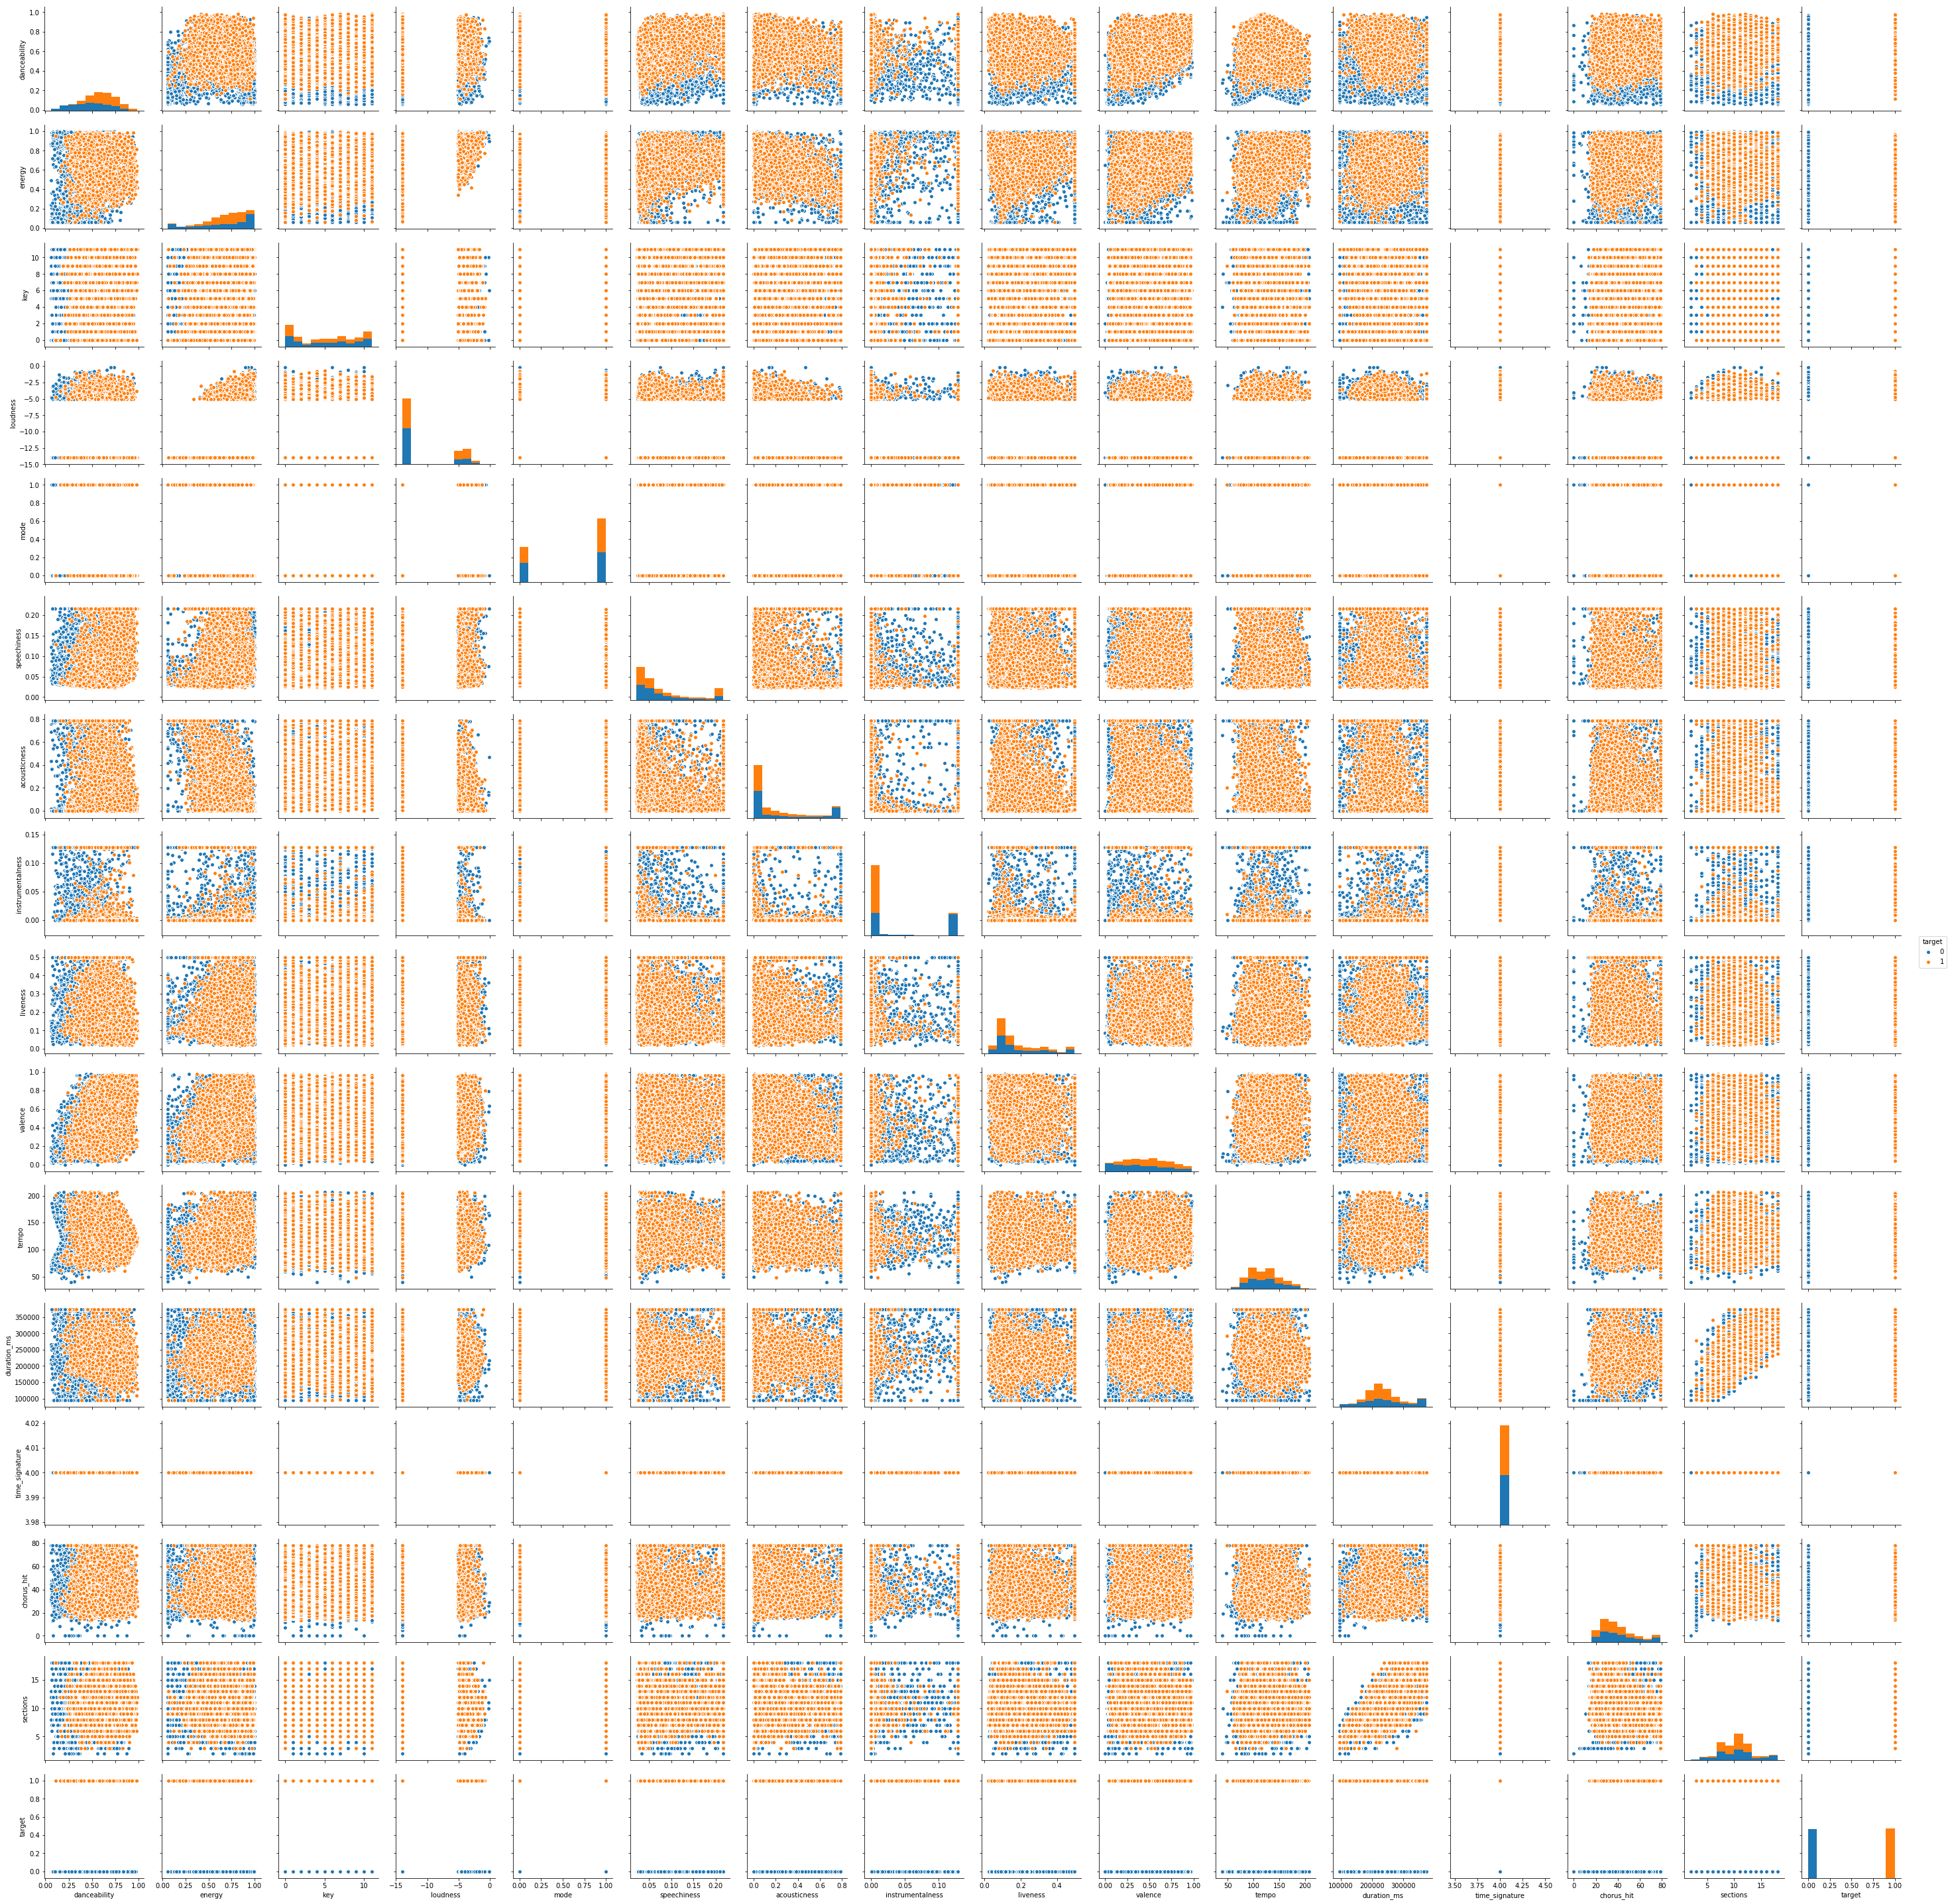

In [10]:
sns.pairplot(train_set_numerical, hue="target", kind="scatter")
plt.show()

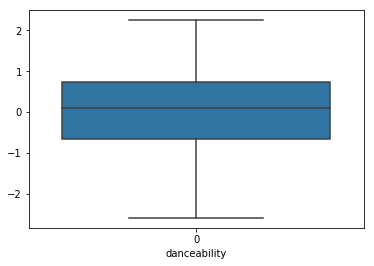

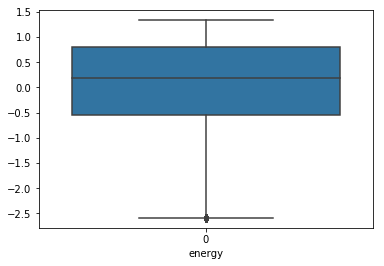

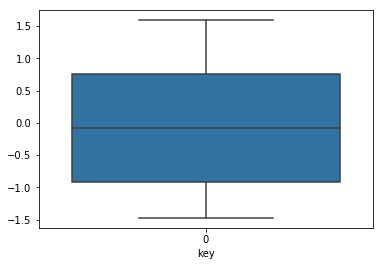

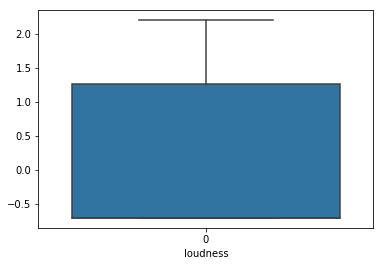

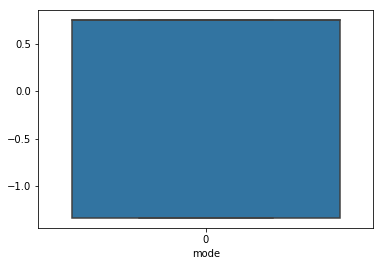

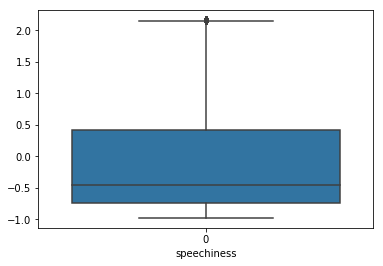

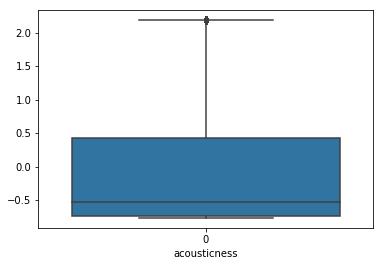

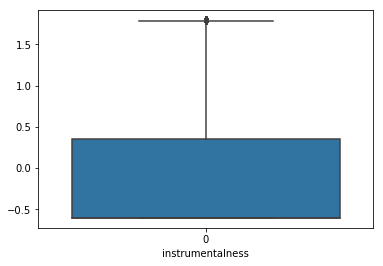

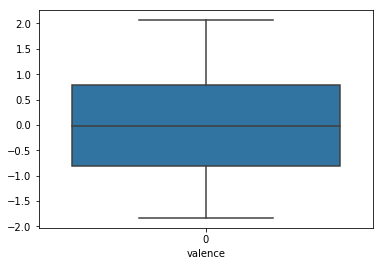

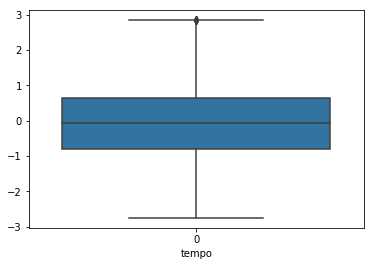

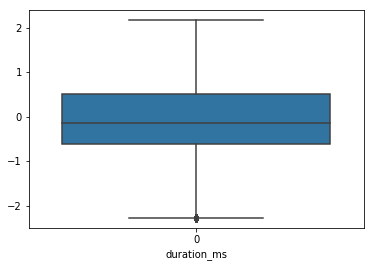

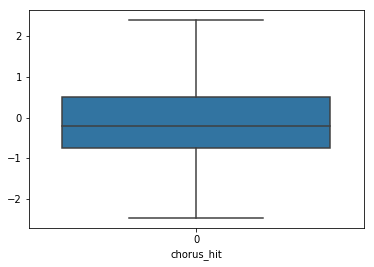

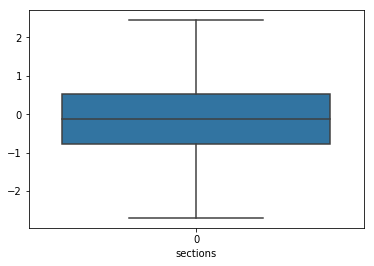

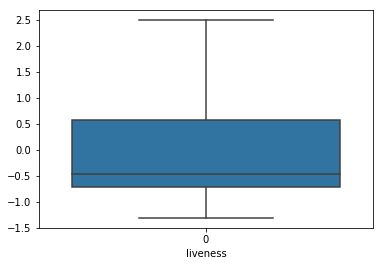

In [44]:
sns.boxplot(data=std_X_train['danceability'])
plt.xlabel('danceability')
plt.show()

sns.boxplot(data=std_X_train['energy'])
plt.xlabel('energy')
plt.show()

sns.boxplot(data=std_X_train['key'])
plt.xlabel('key')
plt.show()

sns.boxplot(data=std_X_train['loudness'])
plt.xlabel('loudness')
plt.show()

sns.boxplot(data=std_X_train['mode'])
plt.xlabel('mode')
plt.show()

sns.boxplot(data=std_X_train['speechiness'])
plt.xlabel('speechiness')
plt.show()

sns.boxplot(data=std_X_train['acousticness'])
plt.xlabel('acousticness')
plt.show()

sns.boxplot(data=std_X_train['instrumentalness'])
plt.xlabel('instrumentalness')
plt.show()

sns.boxplot(data=std_X_train['valence'])
plt.xlabel('valence')
plt.show()

sns.boxplot(data=std_X_train['tempo'])
plt.xlabel('tempo')
plt.show()

sns.boxplot(data=std_X_train['duration_ms'])
plt.xlabel('duration_ms')
plt.show()

sns.boxplot(data=std_X_train['chorus_hit'])
plt.xlabel('chorus_hit')
plt.show()

sns.boxplot(data=std_X_train['sections'])
plt.xlabel('sections')
plt.show()

sns.boxplot(data=std_X_train['liveness'])
plt.xlabel('liveness')
plt.show()


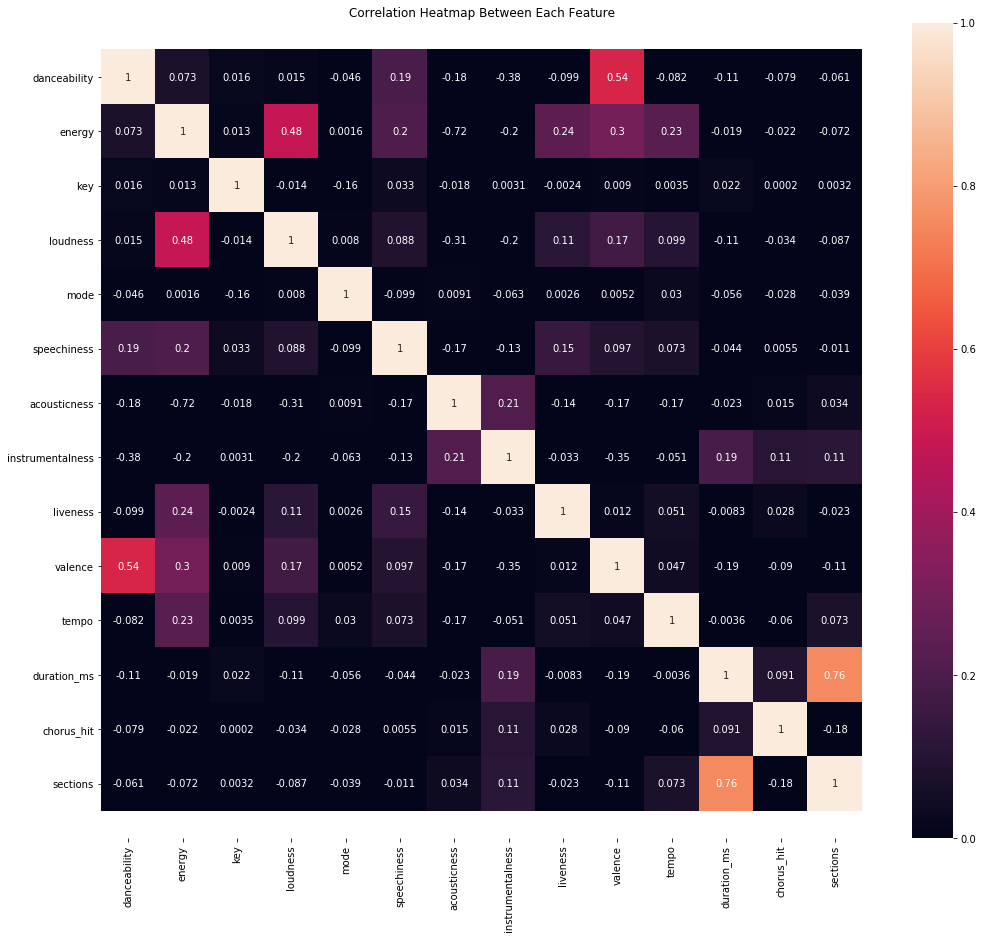

In [54]:
corrmat = std_X_train.corr()
plt.subplots(figsize=(18, 15))
ax = sns.heatmap(corrmat, vmax=1, annot=True, square=True, vmin=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation Heatmap Between Each Feature')
plt.show()

In [41]:
#split train : validation=8:2
from sklearn.model_selection import train_test_split
x_train=std_X_train
y_train=train_set_numerical['target']
#y_train
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, train_size=0.8, random_state=50)
#logistic regression with l1
lamda=np.logspace(-3,3,30)
train_score=[]
val_score=[]
for l in lamda:
    m=LogisticRegression(penalty="l1",C=l, solver="liblinear")
    model=m.fit(x_train, y_train)
    print("lamda:", l)
    print("train score:", model.score(x_train,y_train))
    #train_score.append(model.score(x_train,y_train))
    print("validation score", model.score(x_val, y_val))
    print("")
    train_score.append(model.score(x_train,y_train))
    val_score.append(model.score(x_val, y_val))
    
    
    #test_score.append(m.score(x_test,y_test))
    
best_l=lamda[(val_score.index(max(val_score)))]
print("best l:",best_l)
#print("train acc",train_score)
print("test acc",max(val_score))


lamda: 0.001
train score: 0.7454105048444671
validation score 0.7526772055073941

lamda: 0.0016102620275609393
train score: 0.7635135135135135
validation score 0.771545130035696

lamda: 0.002592943797404667
train score: 0.7698878123406425
validation score 0.77766445690974

lamda: 0.0041753189365604
train score: 0.7723100458949516
validation score 0.7802141764405915

lamda: 0.006723357536499335
train score: 0.7788118306986231
validation score 0.7893931667516573

lamda: 0.010826367338740546
train score: 0.7868434472208057
validation score 0.7904130545639979

lamda: 0.017433288221999882
train score: 0.7907955124936257
validation score 0.7934727180010199

lamda: 0.02807216203941177
train score: 0.7925803161652218
validation score 0.7955124936257012

lamda: 0.04520353656360243
train score: 0.7932177460479347
validation score 0.7970423253442122

lamda: 0.0727895384398315
train score: 0.793727689954105
validation score 0.7965323814380418

lamda: 0.11721022975334805
train score: 0.793855175930

In [42]:
#logistic regression with l2
lamda=np.logspace(-3,3,30)
train_score=[]
val_score=[]
for l in lamda:
    m=LogisticRegression(penalty="l2",C=l, solver="liblinear")
    model=m.fit(x_train, y_train)
    print("lamda:", l)
    print("train score:", model.score(x_train,y_train))
    #train_score.append(model.score(x_train,y_train))
    print("validation score", model.score(x_val, y_val))
    print("")
    train_score.append(model.score(x_train,y_train))
    val_score.append(model.score(x_val, y_val))
    
    
    #test_score.append(m.score(x_test,y_test))
    
best_l=lamda[(val_score.index(max(val_score)))]
print("best l:",best_l)
#print("train acc",train_score)
print("val acc",max(val_score))


lamda: 0.001
train score: 0.7808516063233044
validation score 0.788883222845487

lamda: 0.0016102620275609393
train score: 0.784931157572667
validation score 0.7914329423763387

lamda: 0.002592943797404667
train score: 0.786460989291178
validation score 0.791942886282509

lamda: 0.0041753189365604
train score: 0.7907955124936257
validation score 0.7960224375318715

lamda: 0.006723357536499335
train score: 0.7906680265170831
validation score 0.7955124936257012

lamda: 0.010826367338740546
train score: 0.7910504844467109
validation score 0.7985721570627231

lamda: 0.017433288221999882
train score: 0.7923253442121366
validation score 0.7955124936257012

lamda: 0.02807216203941177
train score: 0.7941101478837328
validation score 0.7955124936257012

lamda: 0.04520353656360243
train score: 0.7950025497195309
validation score 0.7944926058133606

lamda: 0.0727895384398315
train score: 0.7950025497195309
validation score 0.7955124936257012

lamda: 0.11721022975334805
train score: 0.794620091789

In [86]:
#decision tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

model_tree = tree.DecisionTreeClassifier()

# search the best params

grid_tree= {'min_samples_split': [5, 10, 20, 50, 100,200, 500],
         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'min_samples_leaf': [1, 2, 4,8,16]}

params_tree = GridSearchCV(model_tree, grid_tree,cv=5)
params_tree.fit(x_train, y_train)

pred_tree = params_tree.predict(x_val)

# get the accuracy score
acc_tree = accuracy_score(pred_tree, y_val)
print("the validation error=", acc_tree)
print(params_tree.best_params_)

the validation error= 0.8169301376848547
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 100}


In [91]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# search the best params
#grid_rf = {'n_estimators':[100,200,300,400,500], 'max_depth': [2, 5, 10]}
grid_rf={'max_depth': [2,5,10, 20, None],
          'min_samples_leaf': [1, 2, 4],
          'min_samples_split': [2, 5, 10],
          'n_estimators': [100, 200, 300, 400, 500]}

clf_rf = GridSearchCV(rf, grid_rf, cv=5)
clf_rf.fit(x_train, y_train)

pred_rf = clf_rf.predict(x_val)
# get the accuracy score
acc_rf = accuracy_score(pred_rf, y_val)
print(acc_rf)
print(clf_rf.best_params_)

0.8516063233044365
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [92]:
from sklearn.ensemble import AdaBoostClassifier

adaboost=AdaBoostClassifier()
grid_ada={'n_estimators':[100,200,300,400,500],
          'learning_rate':[0.025,0.05, 0.1, 0.15,0.20,0.25,0.30]}

param_ada=GridSearchCV(adaboost, grid_ada, cv=5)
param_ada.fit(x_train, y_train)
pred_ada=param_ada.predict(x_val)
acc_ada=accuracy_score(pred_ada, y_val)
print("validation error of AdaBoost=", acc_ada)
print("best paramaters:", param_ada.best_params_)

validation error of AdaBoost= 0.8327383987761346
best paramaters: {'learning_rate': 0.25, 'n_estimators': 400}


In [9]:
test_set_n=test_set.drop(['Unnamed: 0'],axis=1).drop(['track'],axis=1).drop(['artist'],axis=1).drop(['uri'],axis=1)
#test_set_numerical=
std_X_test= (test_set_n.drop(['target'],axis=1)- X_train.mean()) / X_train.std()
std_x_test=std_X_test.drop(['time_signature'],axis=1)
std_x_test

#test_set_n

danceability    energy       key  loudness      mode  speechiness  \
0        -0.684338  1.109115 -1.194339  1.278148  0.747838     1.164607   
1         1.077953 -0.150451  0.475051  0.818377  0.747838     2.264043   
2        -0.882466 -0.372235 -0.359644  0.927817  0.747838    -0.748088   
3         0.530496  0.673916  1.031515  1.348173  0.747838    -0.610659   
4        -2.019092  1.318346  0.196820  1.967071 -1.337051     3.395816   
5         1.693192 -0.430820  0.475051  0.755481  0.747838    -0.541136   
6        -0.100384 -0.665158  1.031515  1.099733  0.747838    -0.919471   
7         0.118599  0.895701  1.309747  1.089879  0.747838    -0.862882   
8        -0.225517  0.334963  0.475051  1.700601  0.747838    -0.838630   
9        -2.180722 -2.754950  1.309747 -4.503478  0.747838    -0.450594   
10       -1.273507  0.640440 -0.916108  0.555471  0.747838     0.340030   
11        0.582635  0.255456 -1.194339  1.366832  0.747838    -0.730303   
12       -2.196364 -2.305524  0.475051 -1.361604  0.747838    -0.673715   
13       -2.008664 -2.747418 -0.637876 -3.652912  0.747838    -0.610659   
14        1.088381 -0.472666 -1.472571  0.426324  0.747838    -0.356818   
15       -0.053459 -1.313772 -0.916108  0.232395  0.747838    -0.730303   
16        2.152013 -1.179864 -1.472571 -0.675826  0.747838     4.317402   
17        1.985169 -0.656789 -0.081412  0.819426  0.747838    -0.376220   
18       -1.768826 -0.711188 -1.194339  0.172853  0.747838    -0.722219   
19        0.280230  0.531640 -0.081412  0.712292  0.747838     0.230086   
20        0.931965 -0.782327 -1.472571  0.647929  0.747838     3.638339   
21       -1.091021  1.071454  1.031515  1.125730  0.747838     1.584980   
22       -0.465355  0.954285  0.753283  1.043965  0.747838    -0.374603   
23       -0.986744  1.088192 -1.194339  1.152985 -1.337051    -0.216155   
24        1.291723 -0.133713 -0.359644  0.300532 -1.337051     1.859839   
25       -0.069100 -0.029098  1.031515  0.590903  0.747838    -0.567005   
26        1.557631  0.360071  1.031515  1.241459 -1.337051     0.938253   
27        1.083167 -0.627496 -0.081412  1.061785 -1.337051    -0.408557   
28        0.629560  0.665547 -0.359644  1.403941 -1.337051    -0.807911   
29        0.858970  0.544194 -0.359644  1.859728  0.747838     2.296380   
...            ...       ...       ...       ...       ...          ...   
2423     -1.054524  1.255577 -0.359644  1.430567 -1.337051     1.956848   
2424      0.368866  0.736685  0.753283  1.363687  0.747838    -0.592874   
2425     -1.742756 -0.024913 -1.472571 -0.201379  0.747838    -0.308314   
2426      1.057098 -0.108605 -0.081412 -0.075797  0.747838    -0.694733   
2427      0.822473  0.632070 -1.194339  1.230347 -1.337051     1.083766   
2428     -2.034734  1.263946 -0.359644  1.261376  0.747838     3.654507   
2429     -0.048245  0.954285  1.309747  1.879226 -1.337051     5.400670   
2430      1.427284  0.314040 -0.916108  0.845003  0.747838     0.437039   
2431      0.389721  0.418655  0.196820  1.103926  0.747838     2.231707   
2432     -0.402789 -0.229959  0.475051  0.973521  0.747838    -0.790126   
2433      1.453353  0.067148 -0.081412  1.550279  0.747838     1.843671   
2434     -1.164016 -1.368172 -0.081412 -1.031399  0.747838    -0.560538   
2435     -0.272442  1.251392  1.587978  1.182546  0.747838     0.469376   
2436      0.577421  0.083887 -1.472571  0.950879  0.747838    -0.909770   
2437      0.775548  0.540009 -0.359644  1.587807  0.747838    -0.822462   
2438      0.144669 -0.083497  1.587978  1.161581  0.747838    -0.731920   
2439      0.431432 -0.100236 -0.081412  0.992180  0.747838    -0.764257   
2440     -1.628051  0.682286 -0.916108  0.641639  0.747838     3.266471   
2441      1.124878  0.414471 -1.472571  1.477529  0.747838    -0.324482   
2442     -0.606130  0.305671 -1.472571  1.220074 -1.337051     0.165414   
2443      0.181166 -0.606573 -0.359644  0.200737  0.747838    -0.292146   
2444     -2.175509 -2.731517 -1

In [132]:
#choose random forest
x_test=std_x_test
y_test=test_set_n['target']
model_best = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200)
model_best.fit(std_X_train, train_set_numerical['target'])

pred_best = model_best.predict(x_test)
# get the accuracy score
acc_best = accuracy_score(pred_best, y_test)
print(acc_best)
#print(clf_rf.best_params_)

0.8442723196086425


In [28]:
df1=pd.read_csv('C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/dataset-of-00s.csv')
df2=pd.read_csv('C:/Users/hp/Desktop/EE660/Final_Project/Myproject/dataset/dataset-of-10s.csv')
DATA=pd.concat([df1,df2])
DATA_numerical=DATA.drop(['track','artist','uri','time_signature'], axis=1)
DATA_numerical

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0           0.5780  0.4710    4    -7.270     1       0.0289      0.368000   
1           0.7040  0.8540   10    -5.477     0       0.1830      0.018500   
2           0.1620  0.8360    9    -3.009     1       0.0473      0.000111   
3           0.1880  0.9940    4    -3.745     1       0.1660      0.000007   
4           0.6300  0.7640    2    -4.353     1       0.0275      0.363000   
5           0.7260  0.8370   11    -7.223     0       0.0965      0.373000   
6           0.3650  0.9220    1    -2.644     1       0.0710      0.002850   
7           0.7260  0.6310   11    -8.136     0       0.0334      0.220000   
8           0.4810  0.7860   10    -5.654     1       0.0288      0.053800   
9           0.6470  0.3240    7    -9.679     1       0.0377      0.354000   
10          0.7870  0.6320    8    -3.487     1       0.1370      0.103000   
11          0.4910  0.7760    2    -3.887     1       0.0393      0.314000   
12          0.4550  0.7370    1    -6.206     1       0.0272      0.001140   
13          0.7250  0.7330    0    -6.660     1       0.0242      0.508000   
14          0.4970  0.4210    2   -14.059     0       0.1870      0.985000   
15          0.5090  0.9420   11    -6.899     1       0.0628      0.000639   
16          0.7080  0.7280    7    -7.039     1       0.0298      0.011000   
17          0.5180  0.9160    3    -3.858     1       0.0454      0.000148   
18          0.3950  0.2480    1   -10.025     1       0.0519      0.979000   
19          0.3780  0.9530    9    -3.632     1       0.1380      0.000719   
20          0.9000  0.5930   10    -6.629     0       0.3330      0.055400   
21          0.3290  0.8120    2   -11.480     1       0.0872      0.014100   
22          0.3890  0.5980    4    -8.473     1       0.0363      0.782000   
23          0.7440  0.6970   11    -5.063     0       0.1970      0.010600   
24          0.7230  0.7850    5    -5.722     1       0.0302      0.024700   
25          0.5600  0.8080   10    -6.725     1       0.0306      0.200000   
26          0.6430  0.3910   10   -10.090     1       0.0296      0.622000   
27          0.7350  0.7320   10    -8.915     1       0.0699      0.572000   
28          0.5360  0.0810    8   -20.968     1       0.0877      0.958000   
29          0.5870  0.8800    4    -5.725     1       0.0324      0.078400   
...            ...     ...  ...       ...   ...          ...           ...   
6368        0.8550  0.9680    1    -3.278     1       0.1570      0.014300   
6369        0.3890  0.1270    7   -16.157     0       0.0392      0.990000   
6370        0.2060  0.9950    8    -5.096     1       0.1940      0.013100   
6371        0.5260  0.8720    7    -5.079     1       0.0428      0.245000   
6372        0.7570  0.6180   11    -7.964     0       0.0282      0.262000   
6373        0.5180  0.1360    2   -17.510     0       0.0718      0.994000   
6374        0.4000  0.0831   10   -21.565     1       0.0740      0.986000   
6375        0.5080  0.9200    1    -4.387     1       0.0489      0.000007   
6376        0.3000  0.9830    5    -5.809     0       0.0816      0.000244   
6377        0.6280  0.6380   11    -8.033     1       0.0302      0.293000   
6378        0.2710  0.9820    7    -4.295     1       0.1210      0.000258   
6379        0.4390  0.9930   11    -2.923     1       0.1000      0.000937   
6380        0.7000  0.7420    5    -6.777     0       0.0716      0.072200   
6381        0.7860  0.8540    2    -4.247     1       0.0523      0.072900   
6382        0.0934  0.1880   10   -16.340     0       0.0399      0.940000   
6383        0.2970  0.4100    4   -16.100     0       0.0368      0.273000   
6384        0.3950  0.9270    4    -4.418     1       0.1650      0.116000   
6385        0.8020  0.8200   10    -5.969     0       0.1460      0.057900   
6386        0.3960  0.0440    9   -25.088     0       0.0370      0.984000   
6387        0.5650  0.8050  

In [29]:
import numpy as np
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import accuracy_score,recall_score,f1_score
x_semi = DATA_numerical
labels = x_semi.target
x_train_semi=DATA_numerical.drop(['target'])
reg=np.random.RandomState(42)
random_unlabeled_points = reg.rand(len(x_semi.target))<0.3
#random_unlabeled_points = random_unlabeled_points
y=labels[random_unlabeled_points] #the label before delete the labels
labels[random_unlabeled_points]=-1 # make these labels become unlabeled data
print('Unlabeled Number:',list(labels).count(-1))

semi_model = LabelPropagation()
semi_model.fit(x_train_semi,labels)
y_pred = semi_model.predict(x_train_semi)
y_pred = y_pred[random_unlabeled_points] # predict the unlabeled data
print('ACC',accuracy_score(y,y_pred))
print('REC',recall_score(y,y_pred,average='micro'))
print('F-Score',f1_score(y,y_pred,average='micro'))

Unlabeled Number: 3720
ACC 0.5069892473118279
REC 0.5069892473118279
F-Score 0.5069892473118279
